# Imort Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate Synthetic Data

In [2]:
np.random.seed(42)
num_samples = 100
true_slope = 2.5
true_intercept = 8.0
x_data = np.random.rand(num_samples, 1) * 3
y_data = true_slope * x_data + true_intercept + np.random.randn(num_samples, 1)

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x_data, dtype=torch.float32)
y_tensor = torch.tensor(y_data, dtype=torch.float32)

# Show the synthetic data

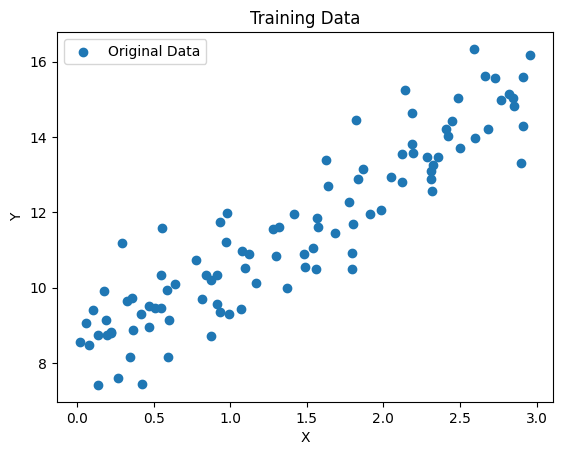

In [3]:
plt.scatter(x_data, y_data, label='Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data')
plt.legend()
plt.show()

# Define the linear regression model

In [4]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model

In [5]:
model = LinearRegressionModel()

# Define loss function and optimizer

In [6]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop

In [7]:
num_epochs = 10000
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Plotting the original data and the fitted line

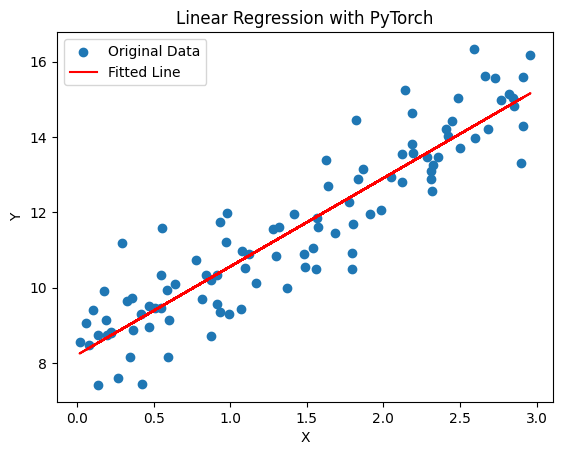

In [8]:
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, model(x_tensor).detach().numpy(), label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with PyTorch')
plt.legend()
plt.show()